<a href="https://colab.research.google.com/github/Renata-Thomazelli/mentoria2021/blob/main/wheat_import_thousand_US_dollars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysing the wheat production**

---



Um pequeno resumo:

O Egito é o país que mais importa trigo em mil dólares americanos (valores até 2019 o que representa 3,92% das importações mundiais.Seguido por Indonésia Turquia, Filipinas e Itália.

Nesta análise focamos nos países:  


Australia, Brazil, Canada, Egypt, India, Indonesia, Philippines, Russian,Turkey, United Kingdom, United States of America , Germany,France e China. 

In [1]:
# Importing Drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing 
import pandas as pd
import numpy as np
import chardet
import missingno as msno

## Reading CSV
---

In [3]:

file_path ='/content/drive/MyDrive/Data_Lake/wheat_importation/'
file = 'wheat_importation.csv'

Reading encoding

In [4]:
with open(f"{file_path}{file}", 'rb') as encoding:
    r_encoding = chardet.detect(encoding.read(100000))
r_encoding

{'confidence': 0.73, 'encoding': 'ISO-8859-1', 'language': ''}

Reading CSV

In [5]:
with open (f"{file_path}{file}",'r',encoding=r_encoding['encoding']) as wheat_importation:
  df_wheat_importation = pd.read_csv(wheat_importation)


# Dataframe

### Na análise da importação do trigo foi possível puxar todos o países, não deu erro na API

In [6]:
df_wheat_importation

,Country,Armenia,Australia,India,Indonesia,Iran (Islamic Republic of),Iraq,Ireland,Israel,Italy,CÃ´te d'Ivoire,Kazakhstan,Jamaica,Austria,Japan,Jordan,Kyrgyzstan,Kenya,Cambodia,Democratic People's Republic of Korea,Republic of Korea,Kuwait,Latvia,Bahamas,Lao People's Democratic Republic,Lebanon,Lesotho,Liberia,Libya,Lithuania,"China, Macao SAR",Madagascar,Bahrain,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,...,Azerbaijan,Benin,Denmark,Dominica,Oceania,Micronesia,Dominican Republic,Belarus,Ecuador,Egypt,El Salvador,Equatorial Guinea,Ethiopia PDR,Estonia,Falkland Islands (Malvinas),Fiji,Finland,France,Angola,Djibouti,Georgia,Gabon,Gambia,Germany,Antigua and Barbuda,Bosnia and Herzegovina,Ghana,Kiribati,Greece,Grenada,Guatemala,Argentina,Guinea,Guyana,Haiti,Honduras,"China, Hong Kong SAR",Hungary,Croatia,Iceland
0,Item,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,...,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat
1,Element,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,...,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value
2,Frequency,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A
3,1961-01-01,0.0,0.0,246460.0,0.0,9670.0,27960.0,18764.0,24120.0,169191.0,0.0,NaN,52.0,4040.0,179440.0,4310.0,0.0,960.0,0.0,23200.0,24019.0,113.0,0.0,0.0,0.0,9180.0,0.0,1.0,860.0,0.0,5.0,3.0,20.0,10.0,1285.0,0.0,0.0,3812.0,0.0,2.0,...,0.0,50.0,1800.0,NaN,9498.0,2.0,2210.0,0.0,3400.0,41480.0,2240.0,NaN,0.0,0.0,NaN,6.0,9300.0,48800.0,1950.0,0.0,0.0,0.0,0.0,285390.0,0.0,NaN,0.0,0.0,2190.0,0.0,4338.0,0.0,NaN,0.0,2284.0,980.0,6050.0,30040.0,0.0,80.0
4,1962-01-01,0.0,0.0,262213.0,0.0,2840.0,0.0,10194.0,22350.0,35794.0,0.0,NaN,125.0,6120.0,180944.0,750.0,0.0,4050.0,0.0,6360.0,26050.0,113.0,0.0,0.0,0.0,14610.0,0.0,0.0,1090.0,0.0,20.0,20.0,30.0,10.0,1433.0,0.0,0.0,3527.0,0.0,2.0,...,0.0,10.0,1070.0,NaN,11284.0,2.0,3360.0,0.0,2890.0,60270.0,2360.0,NaN,79.0,0.0,NaN,8.0,14450.0,50950.0,1940.0,0.0,0.0,0.0,0.0,314840.0,0.0,NaN,1.0,0.0,140.0,1.0,4117.0,0.0,NaN,0.0,3605.0,1150.0,7820.0,11365.0,0.0,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2015-01-01,70621.0,740.0,135033.0,2082768.0,766080.0,136400.0,29150.0,338876.0,2032143.0,159093.0,12945.0,49440.0,187221.0,1652510.0,210494.0,61538.0,332465.0,8203.0,73000.0,1105863.0,98658.0,47536.0,36.0,NaN,142564.0,4513.0,10573.0,2

###Renomeando as colunas e dropando níveis desnecessários
---

In [7]:
def replace (col): 
    return col.replace("-01-01",'')

In [9]:
df_wheat_importation.shape

(62, 194)

In [10]:
anos = {"Country":"Years"}
df_wheat_importation=\
(
    df_wheat_importation.drop(range(0,3))
    .rename(columns=anos)
    .set_index("Years")
    .rename(index=replace)
 )


In [76]:
##verificando tamanho do arquivo
df_wheat_importation.shape

(59, 193)

Verificando países listados

---

In [14]:
df_wheat_importation.columns.to_list()

['Armenia',
 'Australia',
 'India',
 'Indonesia',
 'Iran (Islamic Republic of)',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 "CÃ´te d'Ivoire",
 'Kazakhstan',
 'Jamaica',
 'Austria',
 'Japan',
 'Jordan',
 'Kyrgyzstan',
 'Kenya',
 'Cambodia',
 "Democratic People's Republic of Korea",
 'Republic of Korea',
 'Kuwait',
 'Latvia',
 'Bahamas',
 "Lao People's Democratic Republic",
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Libya',
 'Lithuania',
 'China, Macao SAR',
 'Madagascar',
 'Bahrain',
 'Malawi',
 'Malaysia',
 'Maldives',
 'Mali',
 'Malta',
 'Mauritania',
 'Mauritius',
 'Mexico',
 'Barbados',
 'Mongolia',
 'Morocco',
 'Mozambique',
 'Republic of Moldova',
 'Namibia',
 'Nauru',
 'Nepal',
 'Netherlands',
 'North Macedonia',
 'Vanuatu',
 'New Zealand',
 'Nicaragua',
 'Niger',
 'Nigeria',
 'Bangladesh',
 'Norway',
 'Pakistan',
 'Panama',
 'Czechia',
 'Papua New Guinea',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Guinea-Bissau',
 'Timor-Leste',
 'Eritrea',
 'Qatar',
 'Bhutan',


Note que a China aparece de 4 maneiras diferentes, 
* China, Hong Kong SAR 
* China, Macao SAR
* China Mainland
* China ,Twiwan Province of

---


In [28]:
paises_selecionados = ["Australia","Brazil","Canada","Egypt","India","Indonesia","Philippines","Russian Federation","Turkey","United Kingdom","United States of America","Germany","France","China, Hong Kong SAR","China, Macao SAR","China, Taiwan Province of","China, mainland"]

In [30]:
df_countries_importation= df_wheat_importation[paises_selecionados]

In [31]:
df_countries_importation

,Australia,Brazil,Canada,Egypt,India,Indonesia,Philippines,Russian Federation,Turkey,United Kingdom,United States of America,Germany,France,"China, Hong Kong SAR","China, Macao SAR","China, Taiwan Province of","China, mainland"
Years,,,,,,,,,,,,,,,,,
1961,0.0,138890.0,10.0,41480.0,246460.0,0.0,16860.0,0.0,62190.0,282630.0,11490.0,285390.0,48800.0,6050.0,5.0,19410.0,283000.0
1962,0.0,160950.0,20.0,60270.0,262213.0,0.0,22740.0,0.0,50650.0,291561.0,8280.0,314840.0,50950.0,7820.0,20.0,19220.0,268000.0
1963,0.0,164000.0,0.0,72270.0,303301.0,0.0,27265.0,0.0,57820.0,289730.0,9310.0,201720.0,53370.0,5850.0,120.0,27770.0,419000.0
1964,0.0,209560.0,0.0,70090.0,447432.0,0.0,23640.0,0.0,6130.0,288580.0,5704.0,220140.0,51870.0,7010.0,50.0,23620.0,424000.0
1965,0.0,135900.0,0.0,89780.0,480440.0,0.0,28638.0,0.0,26210.0,320522.0,1631.0,196970.0,52500.0,6490.0,30.0,27870.0,455000.0
1966,0.0,169891.0,0.0,98454.0,609293.0,0.0,27193.0,0.0,17222.0,302044.0,2786.0,215639.0,57400.0,7799.0,13.0,21025.0,466000.0
1967,0.0,180767.0,0.0,126580.0,549425.0,0.0,33631.0,0.0,1954.0,287031.0,844.0,233179.0,51609.0,9570.0,21.0,21883.0,339000.0
1968,0.0,182615.0,0.0,95269.0,367996.0,0.0,31346.0,0.0,1.0,282757.0,1094.0,220441.0,37403.0,11485.0,2.0,32210.0,334000.0
1969,0.0,161963.0,0.0,73460.0,257261.0,0.0,40180.0,0.0,26730.0,317542.0,2590.0,312809.0,45421.0,9298.0,25.0,45994.0,247000.0


Identificando valores NA

---

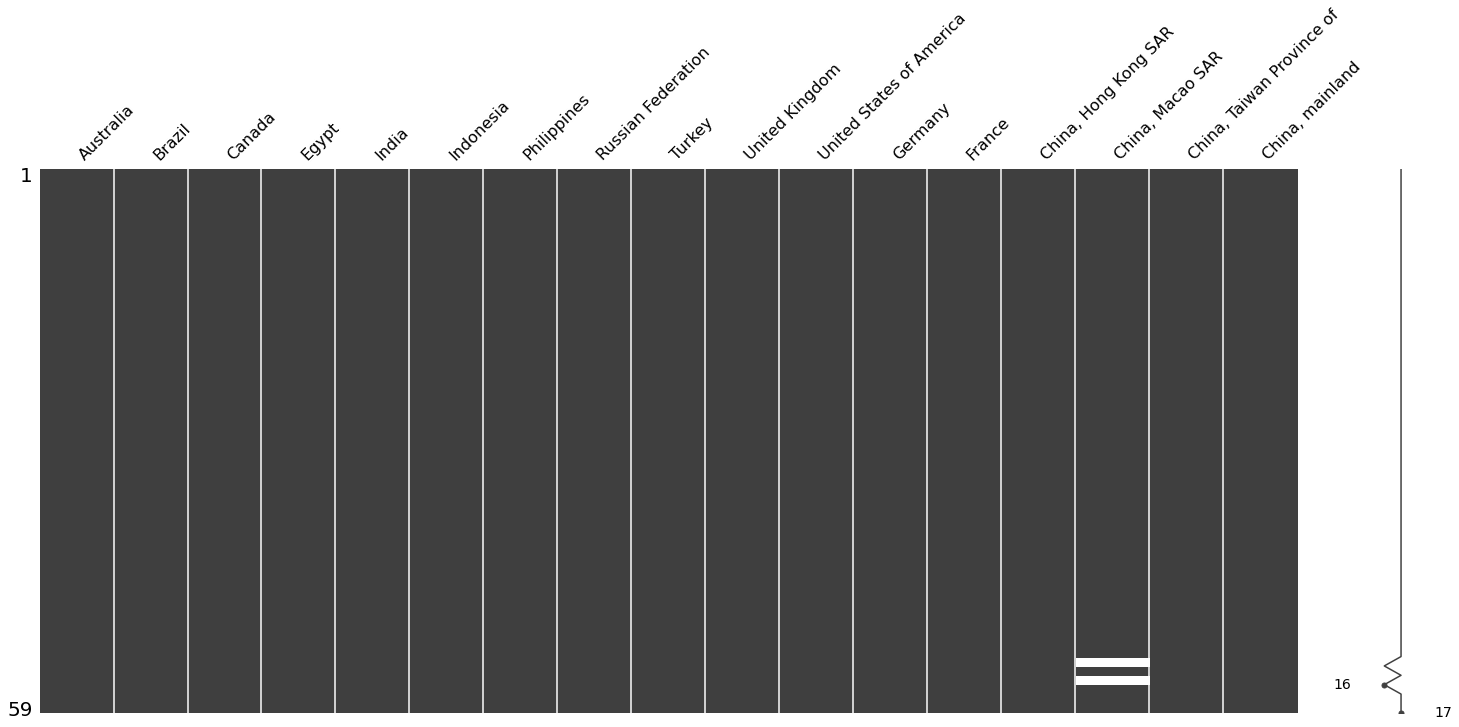

In [32]:
msno.matrix(df_countries_importation)

In [33]:
df_countries_importation.isna().sum()

Australia                    0
Brazil                       0
Canada                       0
Egypt                        0
India                        0
Indonesia                    0
Philippines                  0
Russian Federation           0
Turkey                       0
United Kingdom               0
United States of America     0
Germany                      0
France                       0
China, Hong Kong SAR         0
China, Macao SAR             2
China, Taiwan Province of    0
China, mainland              0
dtype: int64

Identificando tipo de dados

---

In [36]:
df_countries_importation.dtypes

Australia                    object
Brazil                       object
Canada                       object
Egypt                        object
India                        object
Indonesia                    object
Philippines                  object
Russian Federation           object
Turkey                       object
United Kingdom               object
United States of America     object
Germany                      object
France                       object
China, Hong Kong SAR         object
China, Macao SAR             object
China, Taiwan Province of    object
China, mainland              object
dtype: object

Alterando tipo de dados

---

In [37]:
#fillna and changing types
df_countries_importation =\
(
    df_countries_importation.fillna(0)
    .astype(float)
    
   
)



In [38]:
df_countries_importation

,Australia,Brazil,Canada,Egypt,India,Indonesia,Philippines,Russian Federation,Turkey,United Kingdom,United States of America,Germany,France,"China, Hong Kong SAR","China, Macao SAR","China, Taiwan Province of","China, mainland"
Years,,,,,,,,,,,,,,,,,
1961,0.0,138890.0,10.0,41480.0,246460.0,0.0,16860.0,0.0,62190.0,282630.0,11490.0,285390.0,48800.0,6050.0,5.0,19410.0,283000.0
1962,0.0,160950.0,20.0,60270.0,262213.0,0.0,22740.0,0.0,50650.0,291561.0,8280.0,314840.0,50950.0,7820.0,20.0,19220.0,268000.0
1963,0.0,164000.0,0.0,72270.0,303301.0,0.0,27265.0,0.0,57820.0,289730.0,9310.0,201720.0,53370.0,5850.0,120.0,27770.0,419000.0
1964,0.0,209560.0,0.0,70090.0,447432.0,0.0,23640.0,0.0,6130.0,288580.0,5704.0,220140.0,51870.0,7010.0,50.0,23620.0,424000.0
1965,0.0,135900.0,0.0,89780.0,480440.0,0.0,28638.0,0.0,26210.0,320522.0,1631.0,196970.0,52500.0,6490.0,30.0,27870.0,455000.0
1966,0.0,169891.0,0.0,98454.0,609293.0,0.0,27193.0,0.0,17222.0,302044.0,2786.0,215639.0,57400.0,7799.0,13.0,21025.0,466000.0
1967,0.0,180767.0,0.0,126580.0,549425.0,0.0,33631.0,0.0,1954.0,287031.0,844.0,233179.0,51609.0,9570.0,21.0,21883.0,339000.0
1968,0.0,182615.0,0.0,95269.0,367996.0,0.0,31346.0,0.0,1.0,282757.0,1094.0,220441.0,37403.0,11485.0,2.0,32210.0,334000.0
1969,0.0,161963.0,0.0,73460.0,257261.0,0.0,40180.0,0.0,26730.0,317542.0,2590.0,312809.0,45421.0,9298.0,25.0,45994.0,247000.0


In [39]:
#checking the usage and type
df_countries_importation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 1961 to 2019
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Australia                  59 non-null     float64
 1   Brazil                     59 non-null     float64
 2   Canada                     59 non-null     float64
 3   Egypt                      59 non-null     float64
 4   India                      59 non-null     float64
 5   Indonesia                  59 non-null     float64
 6   Philippines                59 non-null     float64
 7   Russian Federation         59 non-null     float64
 8   Turkey                     59 non-null     float64
 9   United Kingdom             59 non-null     float64
 10  United States of America   59 non-null     float64
 11  Germany                    59 non-null     float64
 12  France                     59 non-null     float64
 13  China, Hong Kong SAR       59 non-null     float64
 

Contando valores zerados

---

In [56]:
counting_zeros= (df_countries_importation.reset_index().eq(0).sum())
counting_zeros

Years                         0
Australia                    29
Brazil                        0
Canada                       24
Egypt                         0
India                         1
Indonesia                     9
Philippines                   0
Russian Federation           30
Turkey                        3
United Kingdom                0
United States of America      0
Germany                       0
France                        0
China, Hong Kong SAR          0
China, Macao SAR             21
China, Taiwan Province of     0
China, mainland               0
dtype: int64

*DADOS ESTATÍSTICOS*

---

In [40]:
estatistica = \
(
    df_countries_importation.describe(include=[np.number])
    .T
    .sort_values('max',ascending=False)

)
estatistica

,count,mean,std,min,25%,50%,75%,max
Russian Federation,59.0,1.824350e+05,602787.181864,0.0,0.0,0.0,93015.5,3860000.0
Egypt,59.0,1.039936e+06,963408.066162,41480.0,482500.0,763795.0,1157012.0,3689027.0
Indonesia,59.0,7.094945e+05,892976.847131,0.0,69095.5,333645.0,828560.5,3627763.0
"China, mainland",59.0,9.216215e+05,766804.204591,7330.0,321551.5,780899.0,1410961.5,2882227.0
Brazil,59.0,7.882273e+05,552959.591907,111049.0,286929.5,813919.0,1091916.0,2414821.0
Turkey,59.0,3.497203e+05,521982.970110,0.0,23591.0,97897.0,422122.0,2302225.0
Philippines,59.0,3.741868e+05,408806.832835,16860.0,93117.5,229664.0,442708.0,1847093.0
India,59.0,2.573442e+05,347676.079128,0.0,8406.5,135033.0,301064.5,1404336.0
Germany,59.0,4.730109e+05,300790.746112,129082.0,250224.5,404603.0,567262.5,1394659.0
United States of America,59.0,2.369870e+05,308022.498351,120.0,4135.0,69619.0,315284.5,1099796.0


## ***The Top producer of each Year***

In [73]:
tops_for_year_importation=\
(
    df_countries_importation.reset_index()
    .melt(id_vars = ["Years"],var_name="Countries",value_name = "Importatoin ($)")
    .sort_values(["Years","Importatoin ($)"], ascending= [True,False])
    .drop_duplicates(subset="Years")
    .set_index("Years")
    
    
)
tops_for_year_importation

,Countries,Importatoin ($)
Years,,
1961,Germany,285390.0
1962,Germany,314840.0
1963,"China, mainland",419000.0
1964,India,447432.0
1965,India,480440.0
1966,India,609293.0
1967,India,549425.0
1968,India,367996.0
1969,United Kingdom,317542.0


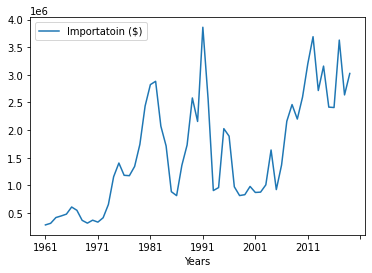

In [74]:
tops_for_year_importation.plot()

## ***The last placed at each year***

---

Identificando países que tem valores zerados

In [63]:
counting_no_zeros=df_countries_importation.reset_index().astype(bool).sum(axis=0.0)
counting_no_zeros



Years                        59
Australia                    30
Brazil                       59
Canada                       35
Egypt                        59
India                        58
Indonesia                    50
Philippines                  59
Russian Federation           29
Turkey                       56
United Kingdom               59
United States of America     59
Germany                      59
France                       59
China, Hong Kong SAR         59
China, Macao SAR             38
China, Taiwan Province of    59
China, mainland              59
dtype: int64

In [64]:
last_for_years_importation=\
(
    
    df_countries_importation.reset_index()
    .melt(id_vars = ["Years"],var_name="Countries",value_name = "Importatoin ($)")
    .sort_values(["Years","Importatoin ($)"], ascending= [True,True])
    
  )
    
last_for_years_importation

              




,Years,Countries,Importatoin ($)
0,1961,Australia,0.0
295,1961,Indonesia,0.0
413,1961,Russian Federation,0.0
826,1961,"China, Macao SAR",5.0
118,1961,Canada,10.0
...,...,...,...
117,2019,Brazil,1491220.0
412,2019,Philippines,1847093.0
530,2019,Turkey,2302225.0
353,2019,Indonesia,2799261.0


Os países com valores zerados foram excluídos da análise para que não ocorresse empate de últimos colocados em relação ao valor da importação

In [66]:
last_for_years_importation=\
(
    last_for_years_importation.loc[last_for_years_importation["Importatoin ($)"]>0,:]
    #drop duplicates
    .drop_duplicates(subset="Years")
    #setting the index
    .set_index("Years")

)
last_for_years_importation

,Countries,Importatoin ($)
Years,,
1961,"China, Macao SAR",5.0
1962,Canada,20.0
1963,"China, Macao SAR",120.0
1964,"China, Macao SAR",50.0
1965,"China, Macao SAR",30.0
1966,"China, Macao SAR",13.0
1967,"China, Macao SAR",21.0
1968,Turkey,1.0
1969,"China, Macao SAR",25.0


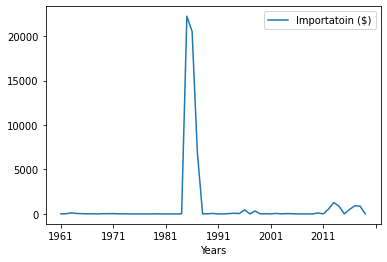

In [72]:
last_for_years_importation.plot()


*Os arquivos gerados estão no mesmo caminho deste Colab*

In [75]:
tops_for_year_importation.to_csv("tops_for_year_importation.csv")
last_for_years_importation.to_csv("last_for_years_importation.csv")
df_countries_importation.to_csv("paises_selecionados_importation.csv")